In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


sns.set_theme()

## Data load

In [3]:
budget_raw = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv')
graduates_raw = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
teachers_degrees_raw = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [4]:
budget_raw.columns = ['year', 'uni', 'budget', 'salary_budget', 'students_budget', 'students', 'students_full_time_budget', 'dorm_cap', 'dorm_students', 'dorm_budget', 'pub_07711', 'pub_07712', 'inflation_rate', 'budget_ia']
budget_raw['other_budget'] = budget_raw['budget'] - budget_raw['students_budget'] - budget_raw['salary_budget'] - budget_raw['dorm_budget']
budget_raw.head(5)

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.0,77024560.0,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.0,21034252.0,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.0,17921956.0,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.0,6960463.0,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.0,9082561.0,4117419.0


In [7]:
inf_rate_2014 = budget_raw.query('year == 2014 and uni == "UK"')[['inflation_rate']].values[0,0]
inf_rate_2014

budget_raw['inflation_rate'] /= inf_rate_2014

In [11]:
budget_raw['budget_ia'] = budget_raw['budget'] / budget_raw['inflation_rate']
budget_raw

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,0.908537,8.477871e+07,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,0.908537,2.315179e+07,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,0.908537,1.972618e+07,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,0.908537,7.661181e+06,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,0.908537,9.996913e+06,4117419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2022,VŠMU,9142448.0,3898279,130386,1058.0,895.0,0.0,0.0,0.0,0.130062,0.058550,1.173780,7.788891e+06,5113783.0
276,2022,VŠVU,6178147.0,2622062,54033,646.0,572.0,0.0,0.0,0.0,0.143084,0.024007,1.173780,5.263460e+06,3502052.0
277,2022,AU,4973187.0,2167269,132002,574.0,511.0,136.0,109.0,8272.0,0.135565,0.049936,1.173780,4.236897e+06,2665644.0
278,2022,KU,8880528.0,3619585,636982,3592.0,2351.0,627.0,479.0,18544.0,1.691091,1.012831,1.173780,7.565749e+06,4605417.0


In [12]:
graduates_raw.columns = ['uni', 'year', 'first_full_time', 'first_part_time', 'third_full_time', 'third_part_time', 'third_external_inst']
graduates_raw.head(5)

,uni,year,first_full_time,first_part_time,third_full_time,third_part_time,third_external_inst
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0


In [13]:
teachers_degrees_raw.columns = ['uni', 'year', 'teacher_type', 'employment_type', 'drsc', 'phd', 'other', 'total']
teachers_degrees_raw.head(5)

,uni,year,teacher_type,employment_type,drsc,phd,other,total
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0


## Overall budget change

In [14]:
budget_totals = (
    pd.concat(
        [
            budget_raw.groupby('year')['budget'].sum().to_frame('budget'),
            budget_raw.groupby('year')['salary_budget'].sum().to_frame('salary_budget'),
            budget_raw.groupby('year')['students_budget'].sum().to_frame('students_budget'),
            budget_raw.groupby('year')['dorm_budget'].sum().to_frame('dorm_budget'),
            budget_raw.groupby('year')['other_budget'].sum().to_frame('other_budget'),
        ], axis = 1)
        .reset_index()
)
budget_totals['salary_budget_share'] = budget_totals['salary_budget'] / budget_totals['budget']
budget_totals['students_budget_share'] = budget_totals['students_budget'] / budget_totals['budget']
budget_totals['dorm_budget_share'] = budget_totals['dorm_budget'] / budget_totals['budget']
budget_totals['other_budget_share'] = budget_totals['other_budget'] / budget_totals['budget']
budget_totals.head(5)


,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292


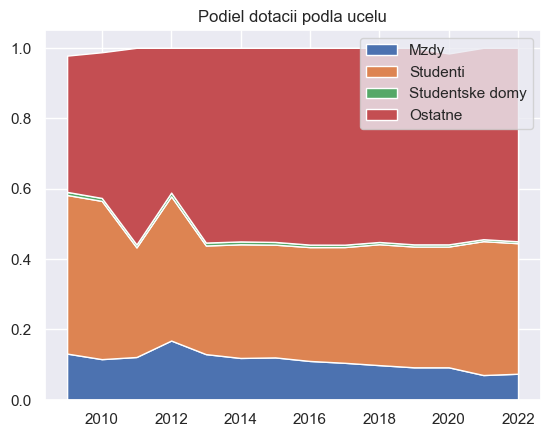

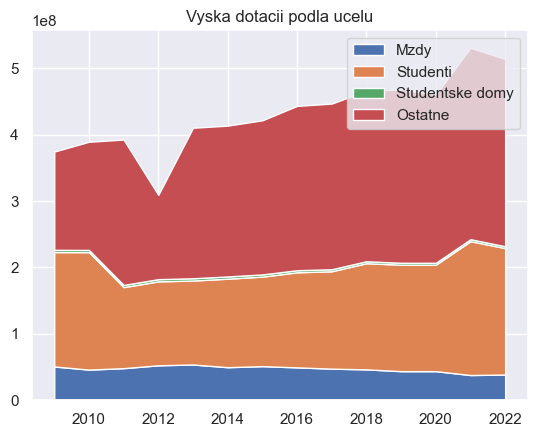

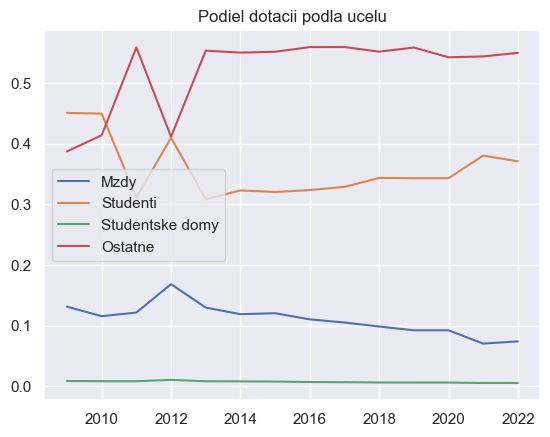

In [15]:
stacked_salary_chart_y = budget_totals[['students_budget_share', 'salary_budget_share', 'dorm_budget_share', 'other_budget_share']].values.T
stacked_salary_chart_y_abs = budget_totals[['students_budget', 'salary_budget', 'dorm_budget', 'other_budget']].values.T
# # Plot
plt.stackplot(budget_totals['year'],stacked_salary_chart_y, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

plt.stackplot(budget_totals['year'],stacked_salary_chart_y_abs, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Vyska dotacii podla ucelu')
plt.legend()
plt.show()


plt.plot(budget_totals['year'],stacked_salary_chart_y.T, label=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

In [16]:
teachers_degrees = teachers_degrees_raw.copy()
teachers_degrees['employment_type'].value_counts()
teachers_degrees['weight'] = teachers_degrees.apply(lambda x: 1 if x.employment_type == 'full-time' else 0.5, axis = 1)
teachers_degrees['total'] *= teachers_degrees['weight']

In [17]:
teachers_types = pd.pivot_table(teachers_degrees.groupby(['uni', 'year', 'teacher_type'])['total'].sum().to_frame('teachers').reset_index(), index = ['uni', 'year'], columns='teacher_type', fill_value=0).reset_index()
teachers_types.columns = ['uni', 'year', 'asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']
teachers_types = teachers_types.merge(budget_raw[['uni', 'year', 'salary_budget']], on = ['uni', 'year'], how = 'left')
teachers_types = teachers_types.dropna()

teachers_types['ucitelia_spolu'] = sum([teachers_types[col] for col in ['asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']])
display(teachers_types)
teachers_types.to_csv('../data/preprocessed/teachers_types_simplified.csv', index = False)

,uni,year,asistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,salary_budget,ucitelia_spolu
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0,1448749,103.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0,1479444,105.5
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5,1147907,115.5
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0,1187816,115.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5,1223047,120.5
...,...,...,...,...,...,...,...,...,...,...
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0,10899800,583.0
276,ŽU,2019,11.0,149.0,0,26.5,300.5,90.0,10994390,577.0
277,ŽU,2020,10.0,151.0,0,23.5,296.0,84.0,10994390,564.5
278,ŽU,2021,9.0,159.5,0,24.0,260.5,87.0,13183264,540.0


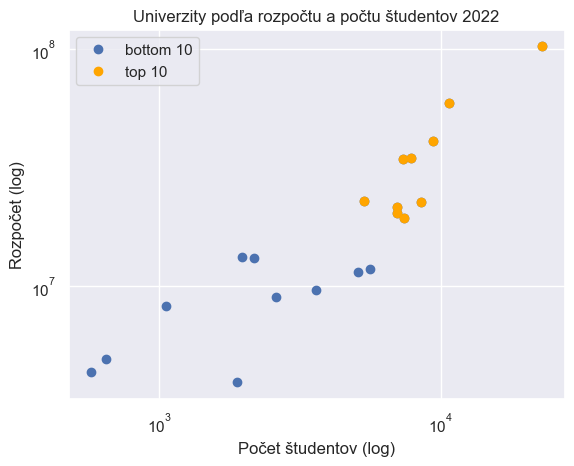

In [18]:
budget_raw['budget_wo_salary'] = (budget_raw['budget'] - budget_raw['salary_budget'])
budget_raw['budget_wo_salary_ia'] = budget_raw['budget_wo_salary'] / budget_raw['inflation_rate']
budget_raw['salary_budget_ia'] = budget_raw['salary_budget'] / budget_raw['inflation_rate']
budget_raw['students_budget_ia'] = budget_raw['students_budget'] / budget_raw['inflation_rate']

plt.plot(budget_raw.query('year == 2022')['students'], budget_raw.query('year == 2019')['budget'], 'o')
plt.loglog()
pass

top10 = budget_raw.query('year==2022').sort_values('budget', ascending=False).head(10)['uni'].unique()
budget = budget_raw.query('uni in @top10')
plt.plot(budget.query('year == 2022')['students'], budget.query('year == 2019')['budget'], 'o', color = 'orange')
plt.title('Univerzity podľa rozpočtu a počtu študentov 2022')
plt.xlabel('Počet študentov (log)')
plt.ylabel('Rozpočet (log)')
plt.legend(['bottom 10', 'top 10'])
plt.show()

## Regresna analyza

In [19]:
from sklearn.linear_model import LinearRegression

Pozn. pracujeme s agregovanymi datami zamestnancov, pricom pozname len stavy full-time/part-time, nie presnu vymeru uvazku.
Toto predstavuje problem, pretoze nam to skresluje realny pocet zamestnancov (lepsie by bolo pracovat s osobohodianmi).
Pre ucely analyzy udavame jednotnu vahu part-time uvazkom 0.5, aby sme aspon ciastocne zmiernili tento efekt, no nie je to idealne riesenie.

Nizsie je vztah medzi poctom studentov a ucitelov jednotlivych univerzit v priebehu rokov.
Kazdy graf zachytava jednu fakultu v obdobi r. 2014-2022.
Body na grafe su jednotlive roky, pricom sme body pospajali sipkami, aby sme videli aj evoluciu, ako sa stav menil v case.
Cierna priamka je linerna regresna priamka vysvetlujuca pocet ucitelov v zavislosti od poctu studentov.

Vidime, ze na vacsine univerzit je tento vztah lokalne linearny, korelacne koeficienty su az na niekolko vynimiek (PU 0.29, TUKE 0.59, UPJS -0.65) vysoke (viac ako 0.8 v absolutnej hodnote).
Jedine dve univerzity s negativnym vztahom su UK a UPJS, na oboch skolach v priebehu rokov klesa pocet studentov a zaroven rastie pocet ucitelov.
Ostatne sledovane univerzity maju velmi podobny vyvoj, sucasne klesa pocet studentov aj ucitelov.
Touto vizualizaciou vyjadrujeme len korelaciu, nie kauzalitu, no kedze vidime celu krivku vyvoja, z grafov sa zda, ze prebieha korekcia - po sebe nasledujuce body (roky) su casto striedavo nad a pod krivkou,
takze interpretacia by mohla byt, ze jedna velicina "reaguje" na zmenu druhej.

\begin{tabular}{lrrr}
\toprule
 uni &   corr &   coef &  intercept \\
\midrule
  EU &  0.970 &  0.041 &      141.3 \\
TUKE &  0.599 &  0.017 &      583.4 \\
 SPU &  0.945 &  0.014 &      330.4 \\
  UK & -0.956 & -0.044 &     3251.7 \\
 UKF &  0.829 &  0.015 &      386.3 \\
  PU &  0.289 &  0.008 &      472.5 \\
 UMB &  0.844 &  0.023 &      300.9 \\
UPJŠ & -0.652 & -0.074 &     1280.3 \\
 STU &  0.974 &  0.031 &      566.7 \\
  ŽU &  0.961 &  0.023 &      375.1 \\
\bottomrule
\end{tabular}



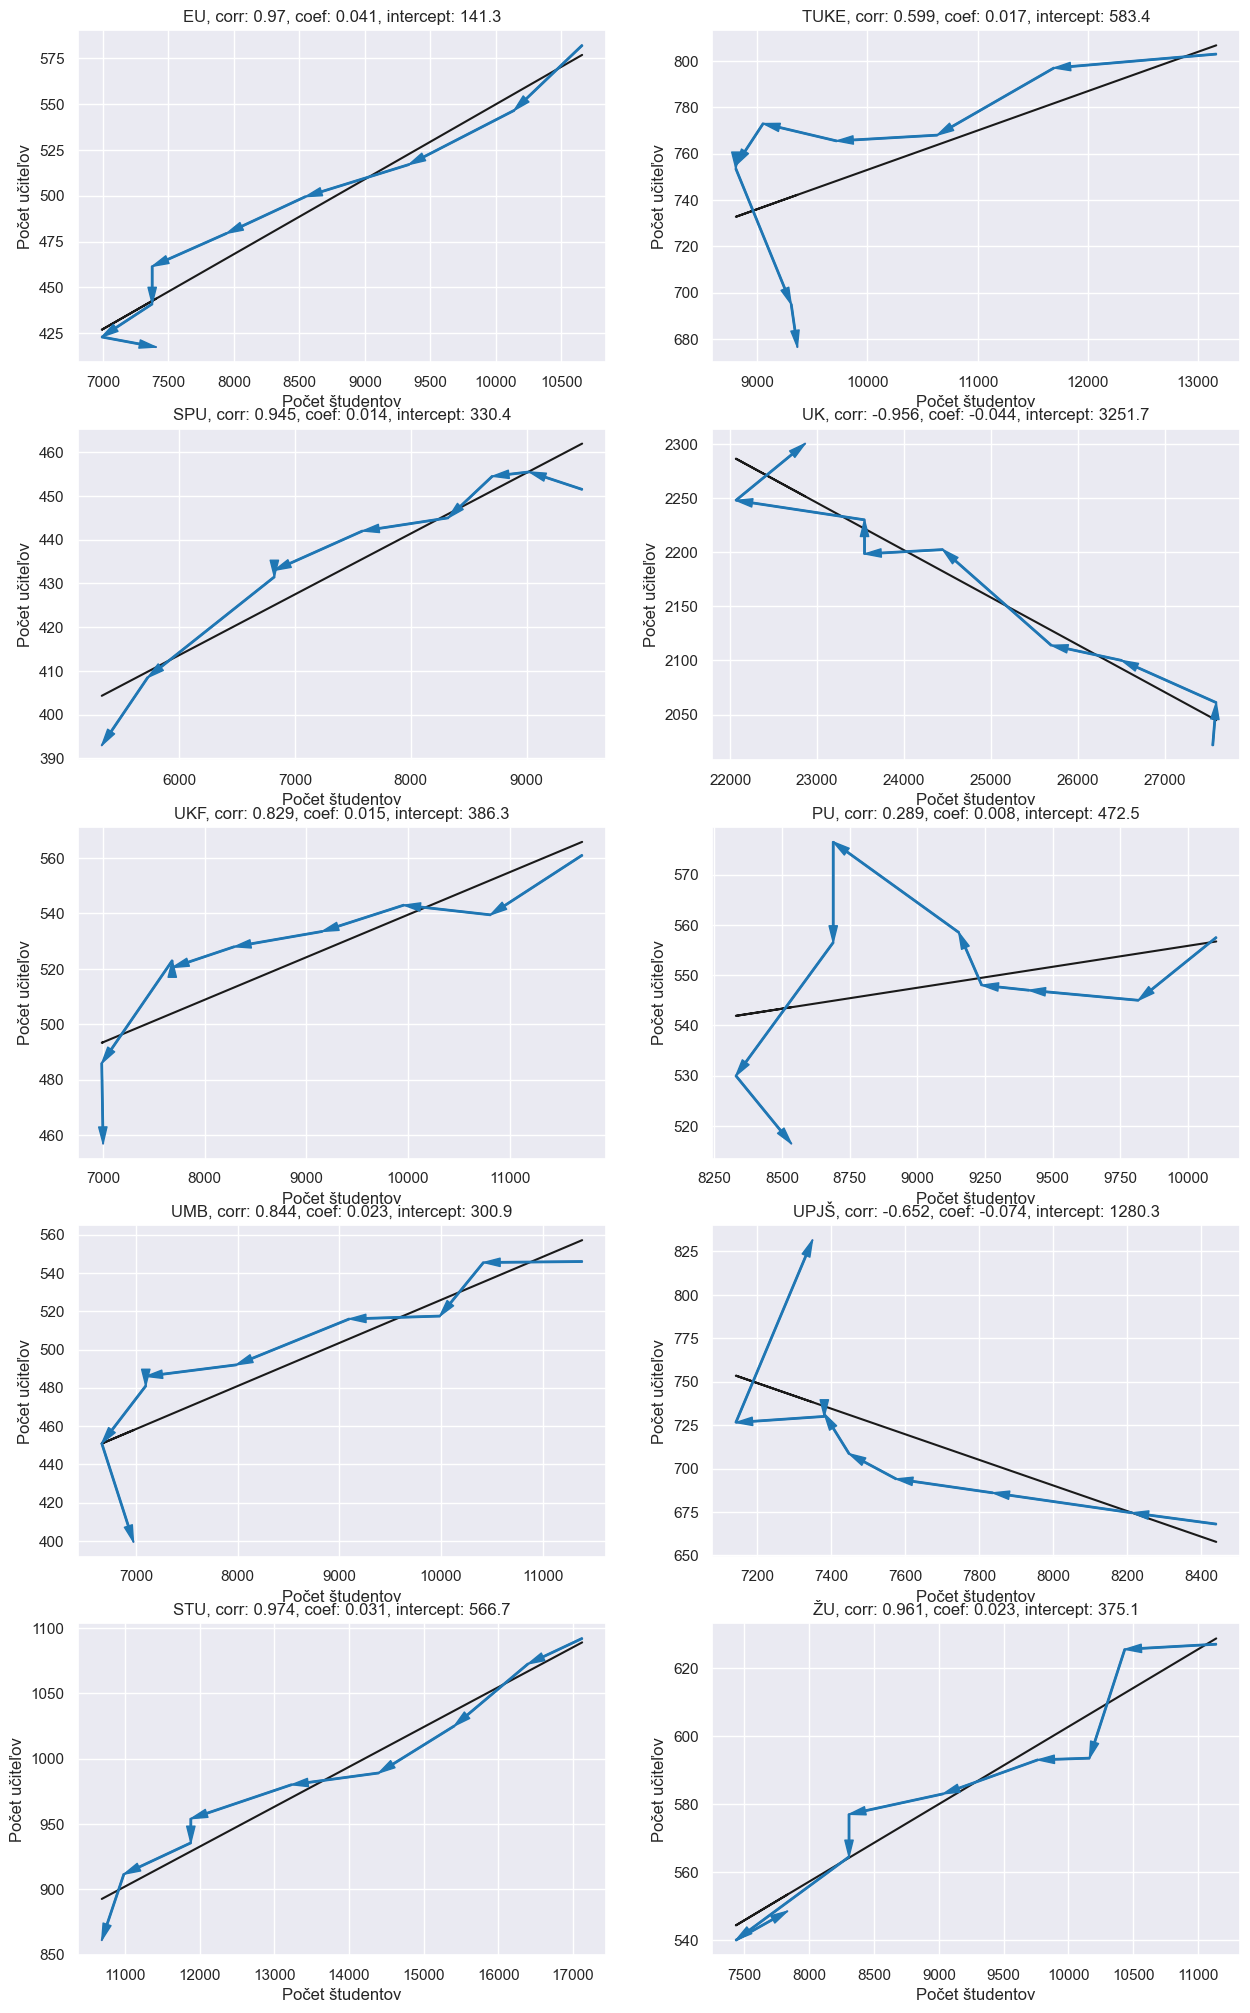

In [20]:
features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students', 'inflation_rate']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 25))

students_teachers_data = []

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['students']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Počet učiteľov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    coef = round(model.coef_[0],3)
    intercept = round(model.intercept_,1)
    corr = round(np.corrcoef(X_students_teachers.T[0],y_students_teachers)[0, 1], 3)
    ax[r][c].set_title(f'{uni}, corr: {corr}, coef: {coef}, intercept: {intercept}')
    students_teachers_data.append((uni, corr, coef, intercept))


fig.savefig('../report/assets/students_teachers_regression_relation', bbox_inches='tight')
students_teachers_df = pd.DataFrame(students_teachers_data, columns = ['uni', 'corr', 'coef', 'intercept'])

print(students_teachers_df.to_latex(index = False))


In [21]:
import matplotlib.patches as mpatches

\begin{tabular}{lrrrrrr}
\toprule
 uni &  corr1 &   coef1 &  intercept1 &  corr2 &   coef2 &  intercept2 \\
\midrule
  EU &  -0.58 &  -258.7 &   9467010.4 &  -0.16 &   -37.5 &   7307110.9 \\
 SPU &  -0.78 &  -304.2 &  10239236.4 &  -0.10 &   -34.4 &   7894481.9 \\
TUKE &  -0.50 &  -720.9 &  21220096.9 &  -0.44 &  -435.5 &  17739237.8 \\
 UMB &  -0.83 &  -243.4 &   9115483.2 &  -0.37 &   -70.8 &   7362306.4 \\
 STU &  -0.81 &  -792.0 &  29821025.8 &  -0.64 &  -388.4 &  23544296.1 \\
  PU &  -0.93 & -2175.4 &  27980113.9 &  -0.87 & -1525.1 &  21698838.0 \\
  ŽU &  -0.95 & -1162.6 &  21394812.5 &  -0.91 &  -741.3 &  17070670.5 \\
 UKF &  -0.76 &  -259.9 &  10125875.3 &  -0.23 &   -58.7 &   8042443.0 \\
  UK &  -0.89 & -3061.8 & 109472907.8 &  -0.88 & -2200.0 &  86504011.5 \\
UPJŠ &  -0.79 & -5200.4 &  50465008.7 &  -0.82 & -4119.5 &  41684591.5 \\
\bottomrule
\end{tabular}



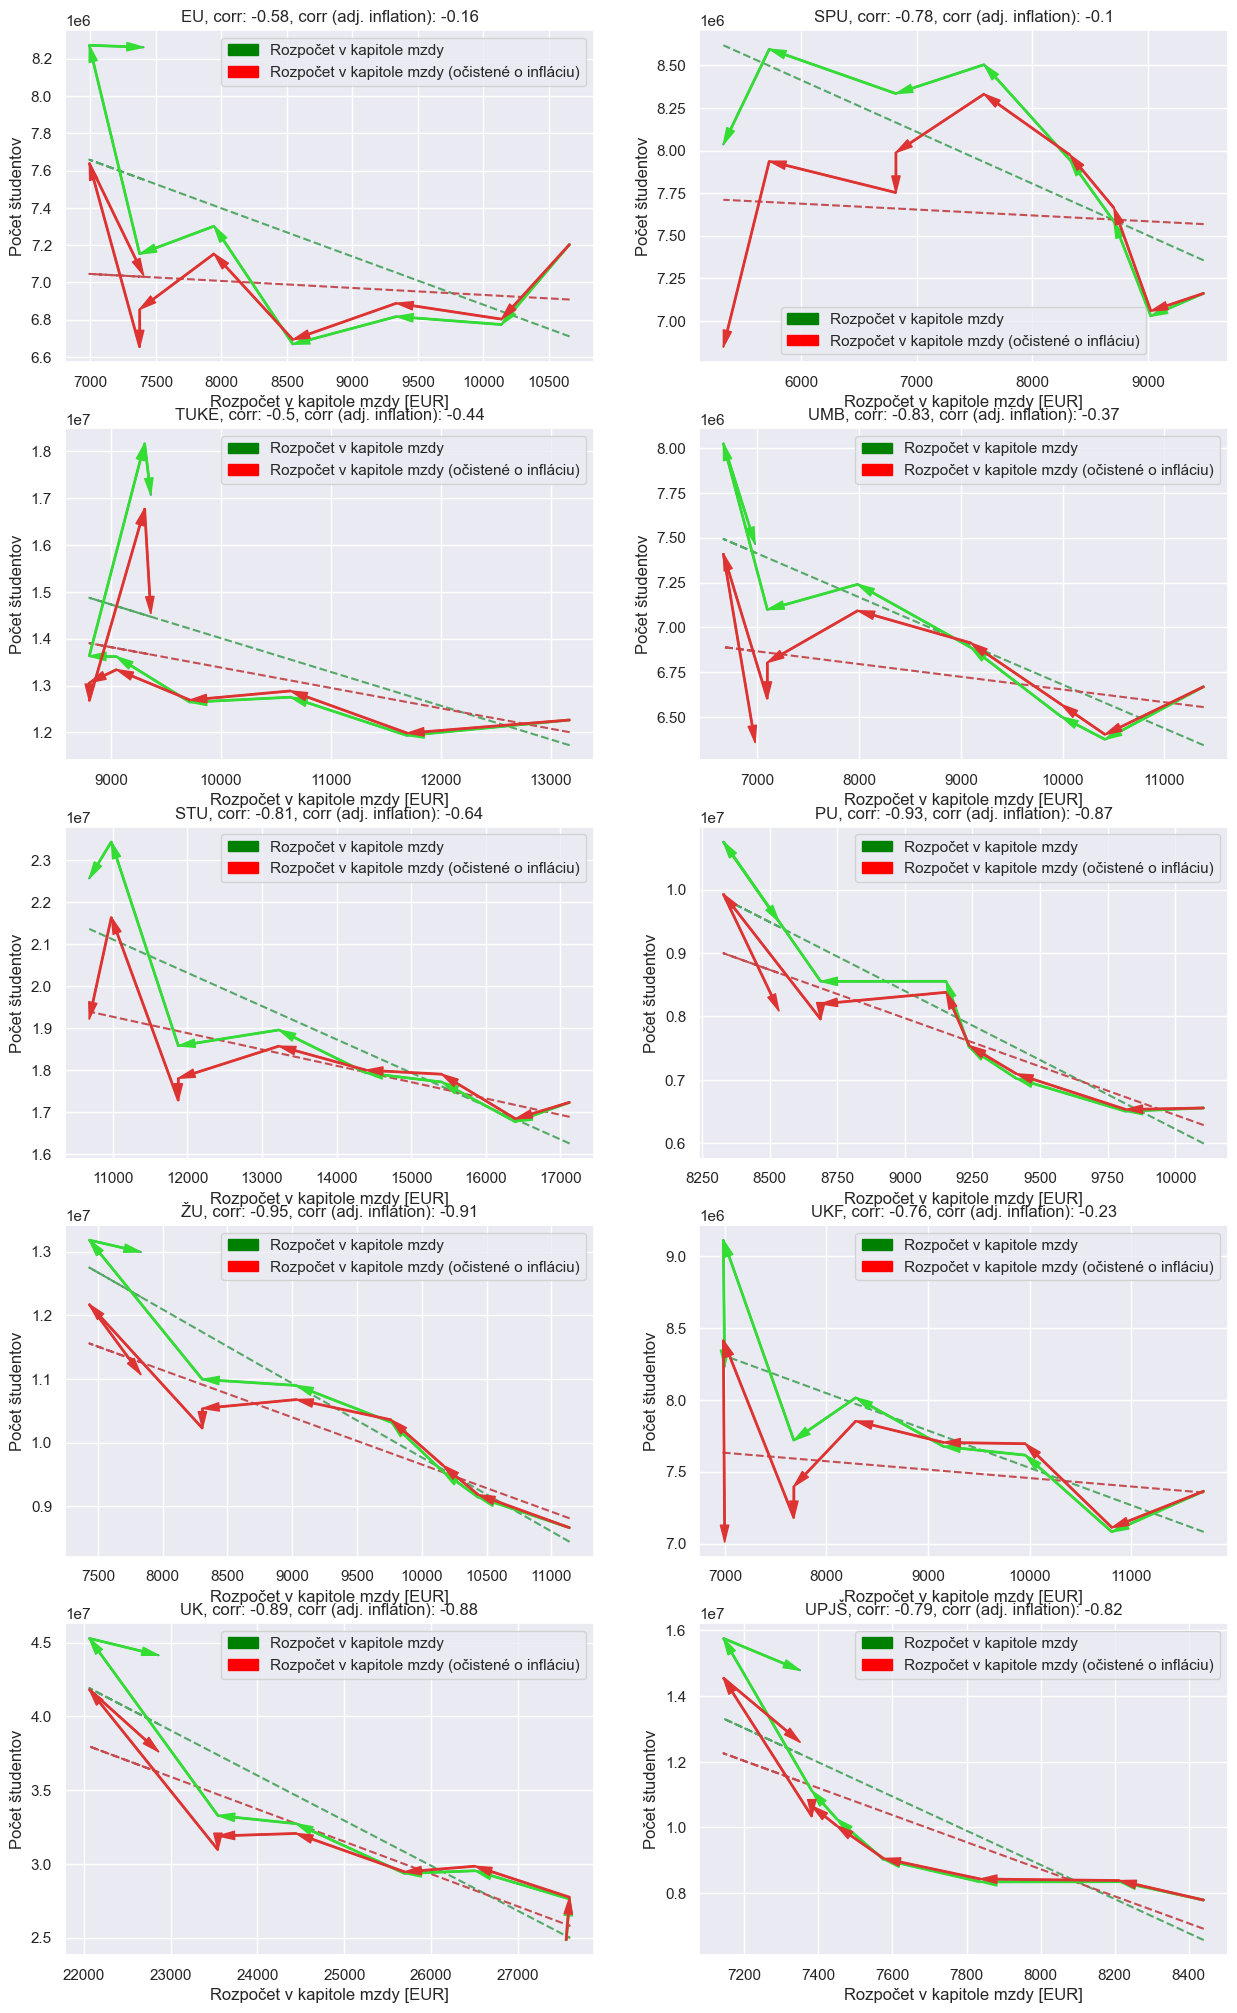

In [102]:
budget_raw['budget_wo_salary'] = (budget_raw['budget'] - budget_raw['salary_budget'])
budget_raw['budget_wo_salary_ia'] = budget_raw['budget_wo_salary'] / budget_raw['inflation_rate']
budget_raw['salary_budget_ia'] = budget_raw['salary_budget'] / budget_raw['inflation_rate']
budget_raw['students_budget_ia'] = budget_raw['students_budget'] / budget_raw['inflation_rate']

features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students_budget_ia', 'students', 'salary_budget_ia', 'budget_wo_salary_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

records = []

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 25))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model1, model2 = LinearRegression(), LinearRegression()
    X = features.query('uni == @uni and year > 2013')[['students']].values
    y1 = features.query('uni == @uni and year > 2013')['salary_budget']
    y2 = features.query('uni == @uni and year > 2013')['salary_budget_ia']
    model1.fit(X, y1)
    model2.fit(X, y2)
    
    for t in range(len(y1)-1):
        ax[r][c].annotate('',xy=(X[t+1][0], list(y1)[t+1]),xytext=(X[t][0], list(y1)[t]),
        arrowprops=dict(color='#33dd33', width=1,headwidth=6))
    
    
    for t in range(len(y2)-1):
        ax[r][c].annotate('',xy=(X[t+1][0], list(y2)[t+1]),xytext=(X[t][0], list(y2)[t]),
        arrowprops=dict(color='#dd3333', width=1,headwidth=6))
        
    y_pred1 = model1.predict(X)
    y_pred2 = model2.predict(X)
    ax[r][c].plot(X, y1, '-') 
    ax[r][c].plot(X, y2, '-') 
    ax[r][c].plot(X, y_pred1, '--', color='g')
    ax[r][c].plot(X, y_pred2, '--', color='r')
    ax[r][c].set_xlabel('Rozpočet v kapitole mzdy [EUR]')
    ax[r][c].set_ylabel('Počet študentov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    coef1 = round(model1.coef_[0],1)
    intercept1 = round(model1.intercept_,1)
    corr1 = round(np.corrcoef(X.T[0],y1)[0, 1], 2)

    coef2 = round(model2.coef_[0],1)
    intercept2 = round(model2.intercept_,1)
    corr2 = round(np.corrcoef(X.T[0],y2)[0, 1], 2)
    
    ax[r][c].legend(handles=[mpatches.Patch(color='green', label='Rozpočet v kapitole mzdy'), mpatches.Patch(color='red', label='Rozpočet v kapitole mzdy (očistené o infláciu)')])
    ax[r][c].set_title(f'{uni}, corr: {corr1}, corr (adj. inflation): {corr2}')
    records.append((uni, corr1, coef1, intercept1, corr2, coef2, intercept2))


fig.savefig('../report/assets/students_teachers_budget_regression_relation', bbox_inches='tight')

summary = pd.DataFrame(records, columns = ['uni', 'corr1', 'coef1', 'intercept1', 'corr2', 'coef2', 'intercept2'])
print(summary.to_latex(index = False))


,uni,corr,coef,intercept
0,EU,0.77,0.0,-108.8
1,TUKE,-0.59,-0.0,1314.5
2,SPU,0.78,0.0,152.3
3,UK,0.58,0.0,929.9
4,UKF,0.70,0.0,264.8
5,PU,0.38,0.0,418.3
6,UMB,0.80,0.0,148.8
7,UPJŠ,0.32,0.0,513.1
8,STU,0.36,0.0,395.8
9,ŽU,-0.12,-0.0,652.9


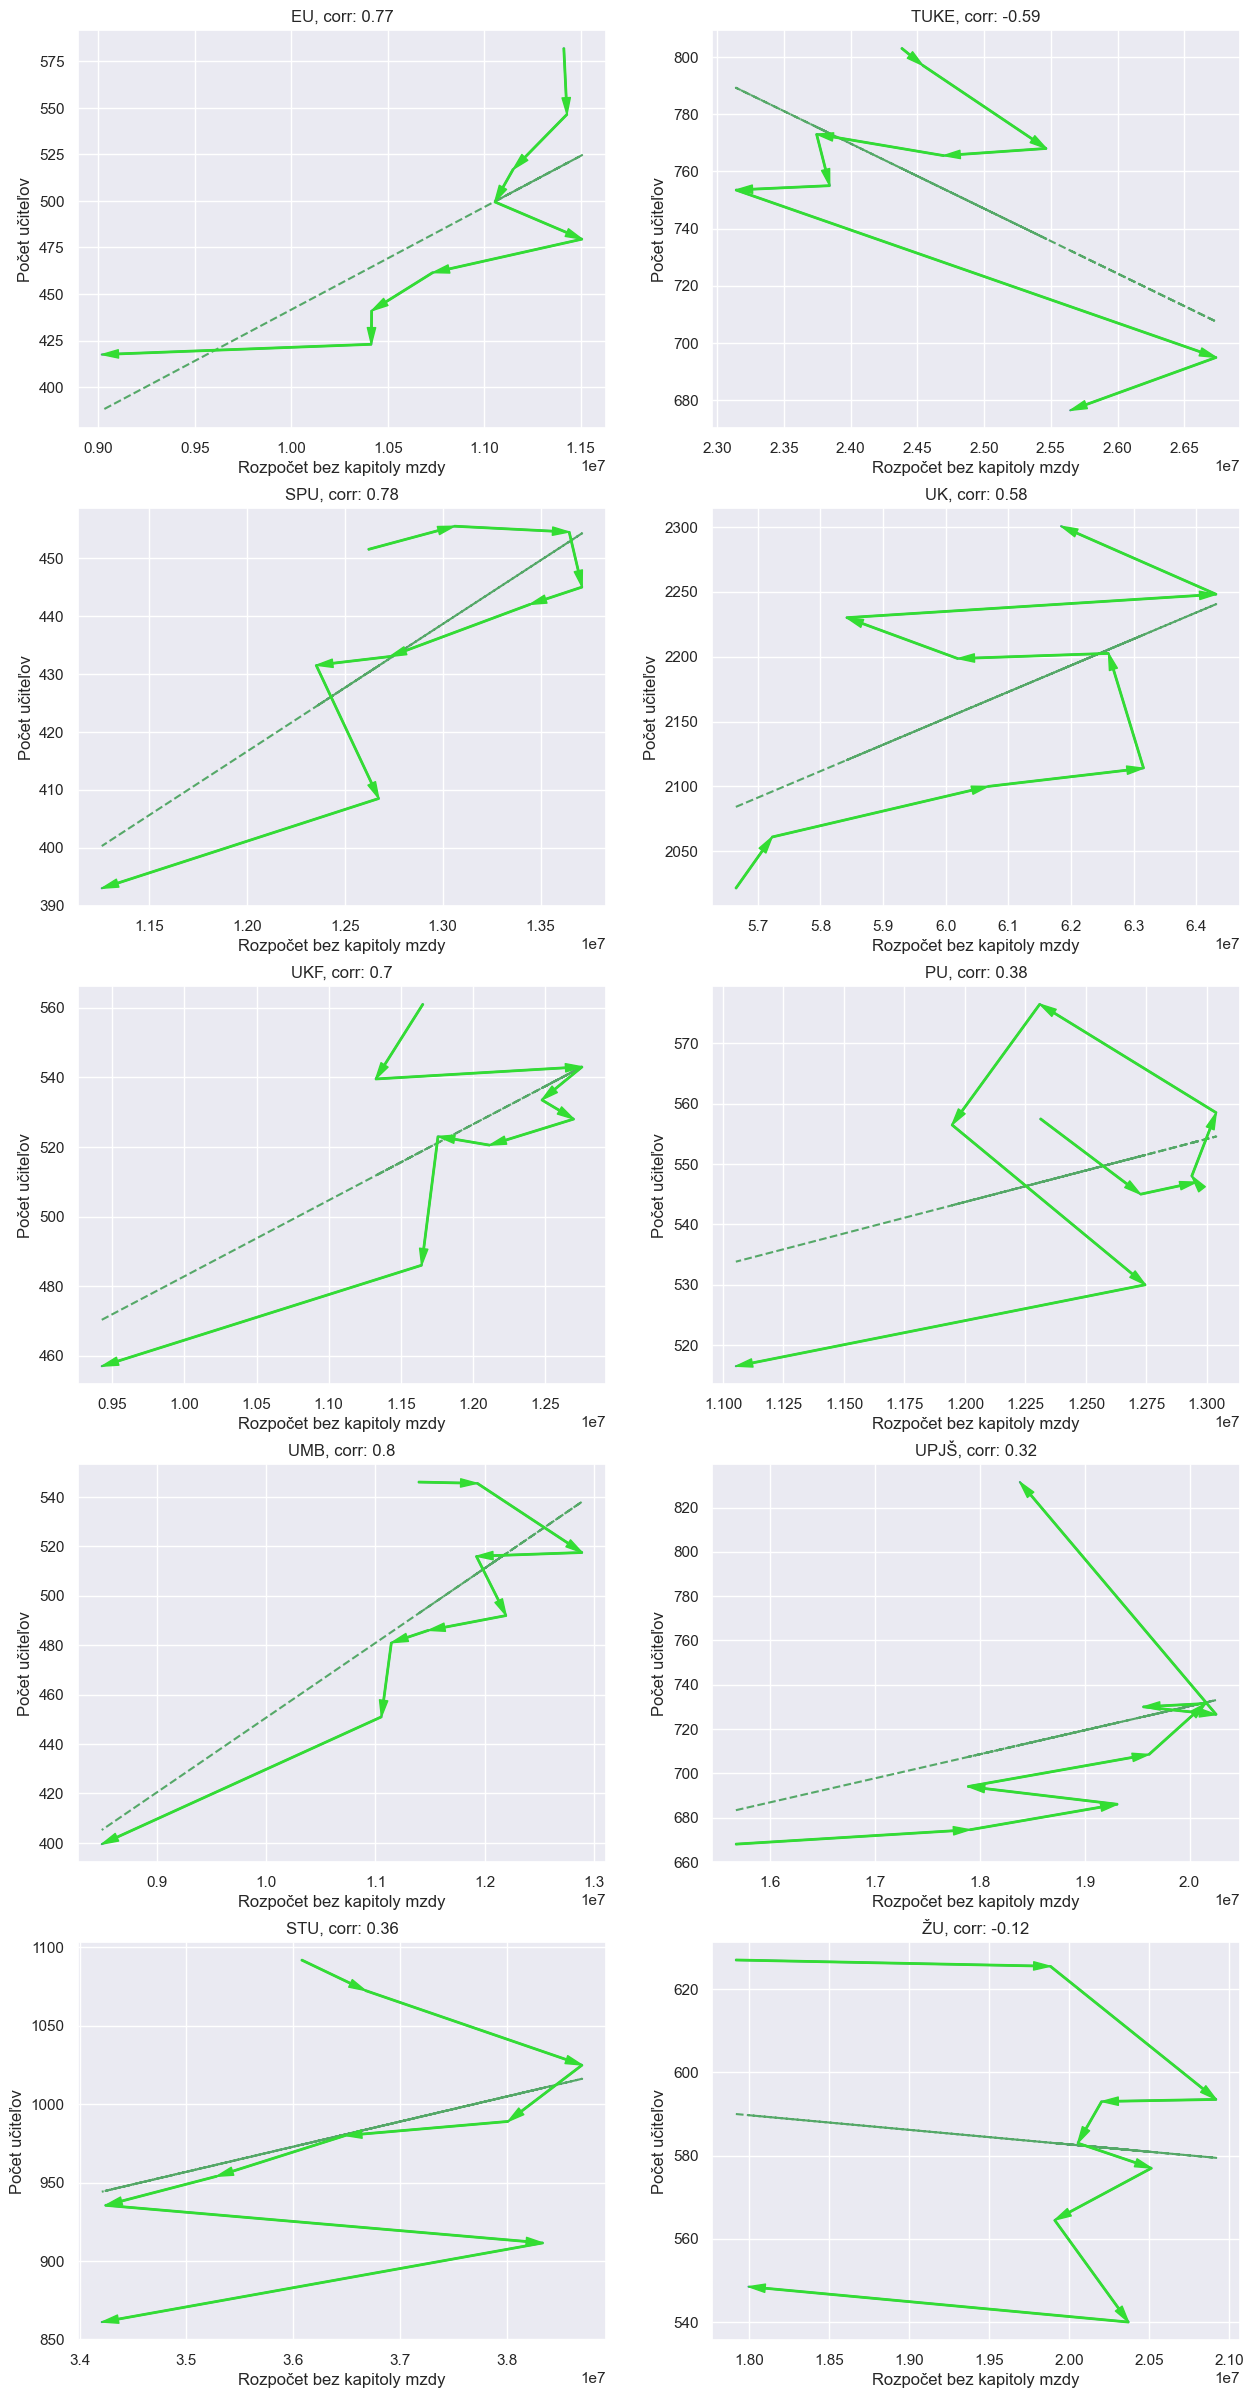

In [97]:
features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students_budget_ia', 'students', 'salary_budget_ia', 'budget_wo_salary_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

records = []

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model1, model2 = LinearRegression(), LinearRegression()
    X = features.query('uni == @uni and year > 2013')[['budget_wo_salary_ia']].values
    y1 = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    # y2 = features.query('uni == @uni and year > 2013')['']
    model1.fit(X, y1)
    # model2.fit(X, y2)
    
    for t in range(len(y1)-1):
        ax[r][c].annotate('',xy=(X[t+1][0], list(y1)[t+1]),xytext=(X[t][0], list(y1)[t]),
        arrowprops=dict(color='#33dd33', width=1,headwidth=6))
    
    
    # for t in range(len(y2)-1):
    #     ax[r][c].annotate('',xy=(X[t+1][0], list(y2)[t+1]),xytext=(X[t][0], list(y2)[t]),
    #     arrowprops=dict(color='#dd3333', width=1,headwidth=6))
        
    y_pred1 = model1.predict(X)
    # y_pred2 = model2.predict(X)
    ax[r][c].plot(X, y1, '-') 
    # ax[r][c].plot(X, y2, '-') 
    ax[r][c].plot(X, y_pred1, '--', color='g')
    # ax[r][c].plot(X, y_pred2, '--', color='r')
    ax[r][c].set_xlabel('Rozpočet bez kapitoly mzdy')
    ax[r][c].set_ylabel('Počet učiteľov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    coef1 = round(model1.coef_[0],1)
    intercept1 = round(model1.intercept_,1)
    corr1 = round(np.corrcoef(X.T[0],y1)[0, 1], 2)
    
    ax[r][c].set_title(f'{uni}, corr: {corr1}')
    records.append((uni, corr1, coef1, intercept1))

summary = pd.DataFrame(records, columns = ['uni', 'corr', 'coef', 'intercept'])
display(summary)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.cluster import KMeans

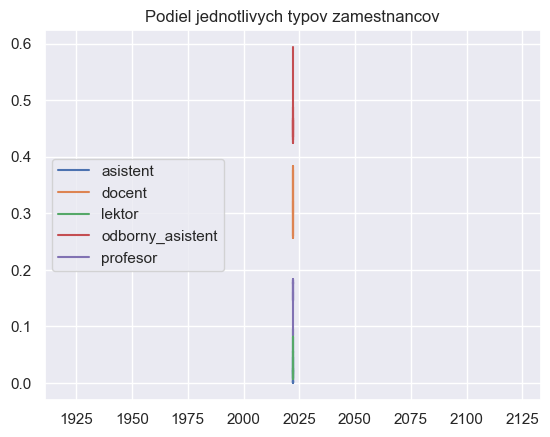

In [82]:
teachers_share = (teachers_types.query('year == 2022 and uni in @top10')
.iloc[:, :8]
.set_index(['year', 'uni']))

teachers_share['total'] = sum([teachers_share[col] for col in teachers_share.columns])

teachers_share = teachers_share.drop(['hostujuci_profesor'], axis = 1)

for col in teachers_share.columns:
    teachers_share[col] /= teachers_share['total']

teachers_share = teachers_share.iloc[:, :-1]

plt.plot(teachers_share.reset_index()['year'], teachers_share, label=teachers_share.columns)
plt.title('Podiel jednotlivych typov zamestnancov')
plt.legend(loc='center left')
plt.show()


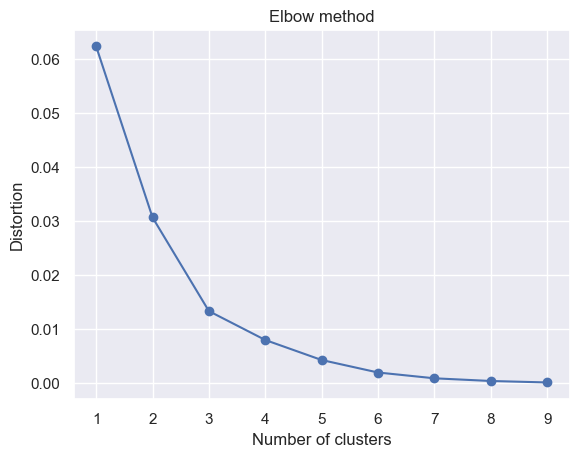

In [83]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(teachers_share.values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('../report/assets/ostre_lakte', bbox_inches='tight')


# elbow metodou vyberame 3 clustre

In [84]:
# finalne rozdelime do clustrov

kmeans = KMeans(n_clusters=3)
kmeans.fit(teachers_share.values)
clusters = kmeans.predict(teachers_share.values)
teachers_share['cluster_id'] = clusters
teachers_share['cluster_id'] = teachers_share['cluster_id'].astype(str)
# teachers_share

In [85]:
clusters_table = teachers_share.reset_index().drop(['year'], axis =1).sort_values(['cluster_id'] +list(teachers_share.columns[1:-1]))

for col in clusters_table.columns[1:-1]:
    clusters_table[col] = clusters_table[col].apply(lambda x: str(round(100 * x, 1)) + '%')

print(clusters_table.to_latex(index = False))

\begin{tabular}{lllllll}
\toprule
 uni & asistent & docent & lektor & odborny\_asistent & profesor & cluster\_id \\
\midrule
  UK &     8.2\% &  25.7\% &   2.6\% &            48.9\% &    14.6\% &          0 \\
UPJŠ &     4.6\% &  25.9\% &   9.6\% &            45.3\% &    14.5\% &          0 \\
  ŽU &     1.6\% &  32.2\% &   5.4\% &            44.7\% &    16.1\% &          1 \\
  PU &     2.2\% &  33.7\% &   5.6\% &            43.4\% &    15.1\% &          1 \\
 SPU &     0.0\% &  34.5\% &   4.3\% &            42.9\% &    18.3\% &          1 \\
 STU &     0.4\% &  34.7\% &   0.9\% &            46.6\% &    17.4\% &          1 \\
 UMB &     0.3\% &  36.7\% &   1.3\% &            46.8\% &    15.0\% &          1 \\
 UKF &     0.0\% &  37.6\% &   0.7\% &            43.4\% &    18.3\% &          1 \\
TUKE &     0.1\% &  38.4\% &   1.3\% &            42.4\% &    17.8\% &          1 \\
  EU &     0.2\% &  29.9\% &   1.9\% &            59.4\% &     8.5\% &          2 \\
\bottomrule
\end{tabular}

In [87]:
# clustre vizualizujeme pomocou PCA

X = teachers_share.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [88]:
# doplname data z pca do dataframeu

X_pca
df_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=teachers_share.index).reset_index()
teachers_share['x1'] = list(df_pca['x1'])
teachers_share['x2'] = list(df_pca['x2'])

teachers_share

asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2022 EU    0.002395  0.299401  0.019162          0.594012  0.085030   
     PU    0.022265  0.336883  0.056147          0.433688  0.151016   
     SPU   0.000000  0.344784  0.043257          0.428753  0.183206   
     STU   0.004065  0.346690  0.009292          0.465738  0.174216   
     TUKE  0.000739  0.384331  0.012565          0.424242  0.178123   
     UK    0.081504  0.257118  0.026081          0.488807  0.146490   
     UKF   0.000000  0.376368  0.006565          0.434354  0.182713   
     UMB   0.002503  0.366708  0.012516          0.468085  0.150188   
     UPJŠ  0.046302  0.259170  0.096212          0.453397  0.144919   
     ŽU    0.016408  0.321787  0.053783          0.446673  0.161349   

          cluster_id        x1        x2  
year uni                                  
2022 EU            2  0.008722  4.392509  
     PU            1  0.214477 -0.407681  
     SPU           1 -0.837612 -1.007320  
     STU           1 -1.099415 -0.131621  
     TUKE          1 -1.765763 -0.902507  
     UK            0  3.004242 -0.182202  
     UKF           1 -1.776071 -0.796554  
     UMB           1 -1.137292  0.325868  
     UPJŠ          0  3.185726 -0.927917  
     ŽU            1  0.202986 -0.362576

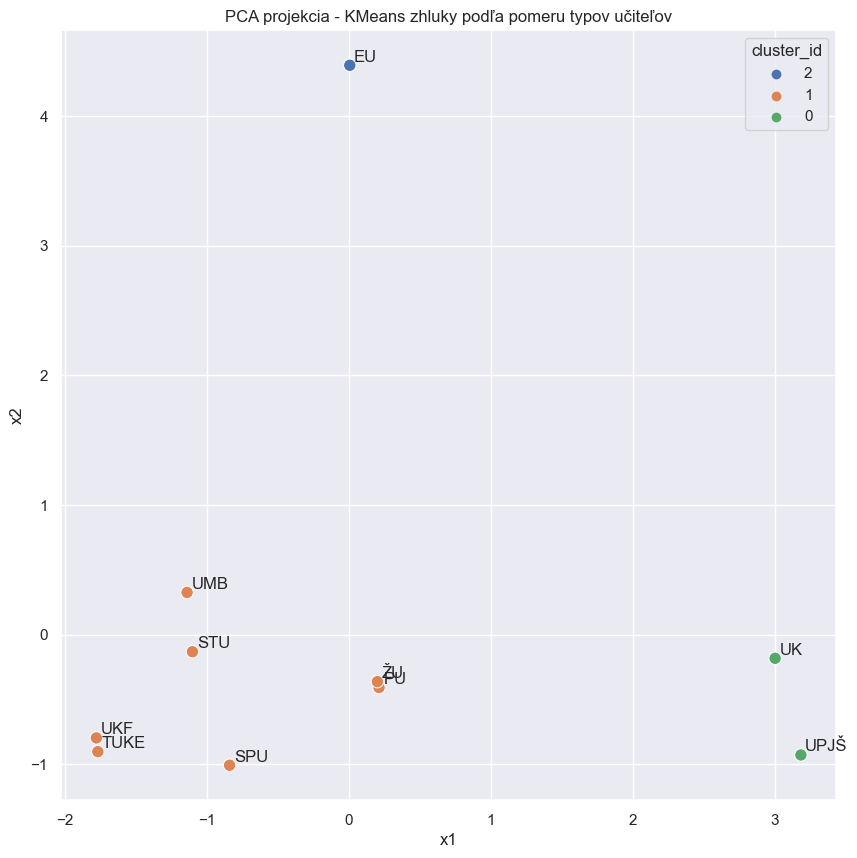

In [89]:
teachers_share['label'] = list(teachers_share.reset_index()['uni'].apply(lambda x: x if x in top10 else 'others'))
teachers_share
fig_pca, ax_pca = plt.subplots(figsize=(10, 10))
ax_pca.set_title('PCA projekcia - KMeans zhluky podľa pomeru typov učiteľov')

sns.scatterplot(data=teachers_share, x="x1", y="x2", hue='cluster_id', s=80, ax=ax_pca)
for i, row in teachers_share.reset_index().iterrows():
    plt.annotate(row.uni, xy=(row.x1 + 0.03, row.x2 + 0.03))

plt.savefig('../report/assets/pca_cluster_projection', bbox_inches='tight')

In [81]:
# teachers_share = (teachers_types.query('uni in @top10')
# .iloc[:, :8]
# .set_index(['year', 'uni']))

# features = teachers_share.query('uni in @top10').merge(budget_raw[['year', 'uni', 'budget_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])
# features
# records = []

# cols = 2
# rows = 5
# fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 30))

# for i, uni in enumerate(features['uni'].unique()):
#     r = i // cols
#     c = i % cols

#     model1, model2 = LinearRegression(), LinearRegression()
#     labels = ['asistent', 'docent', 'lektor', 'odborny_asistent', 'profesor']
#     colors = ['#ab530f', '#aa0011', '#11ee44', '#0000ff', '#ff3300']

#     X = features.query('uni == @uni and year > 2013')[['budget_ia']].values
#     Y = features.query('uni == @uni and year > 2013')[labels].values

#     for k, label in enumerate(labels):
#         y = Y[:, k]
#         for t in range(len(y)-1):
#             ax[r][c].plot(X, y, '-') 
#             ax[r][c].annotate('',xy=(X[t+1][0], list(y)[t+1]),xytext=(X[t][0], list(y)[t]),
#             arrowprops=dict(color=colors[k], width=1,headwidth=6))
    
    
#     ax[r][c].set_title(f'{uni}')

        
#     ax[r][c].legend(handles=[mpatches.Patch(color=colors[k], label=labels[k]) for k in range(len(colors))])


In [94]:

teachers_types = teachers_types.query('uni in @top10 and year > 2013').merge(teachers_share.reset_index()[['uni', 'cluster_id']], on = 'uni', how = 'left')

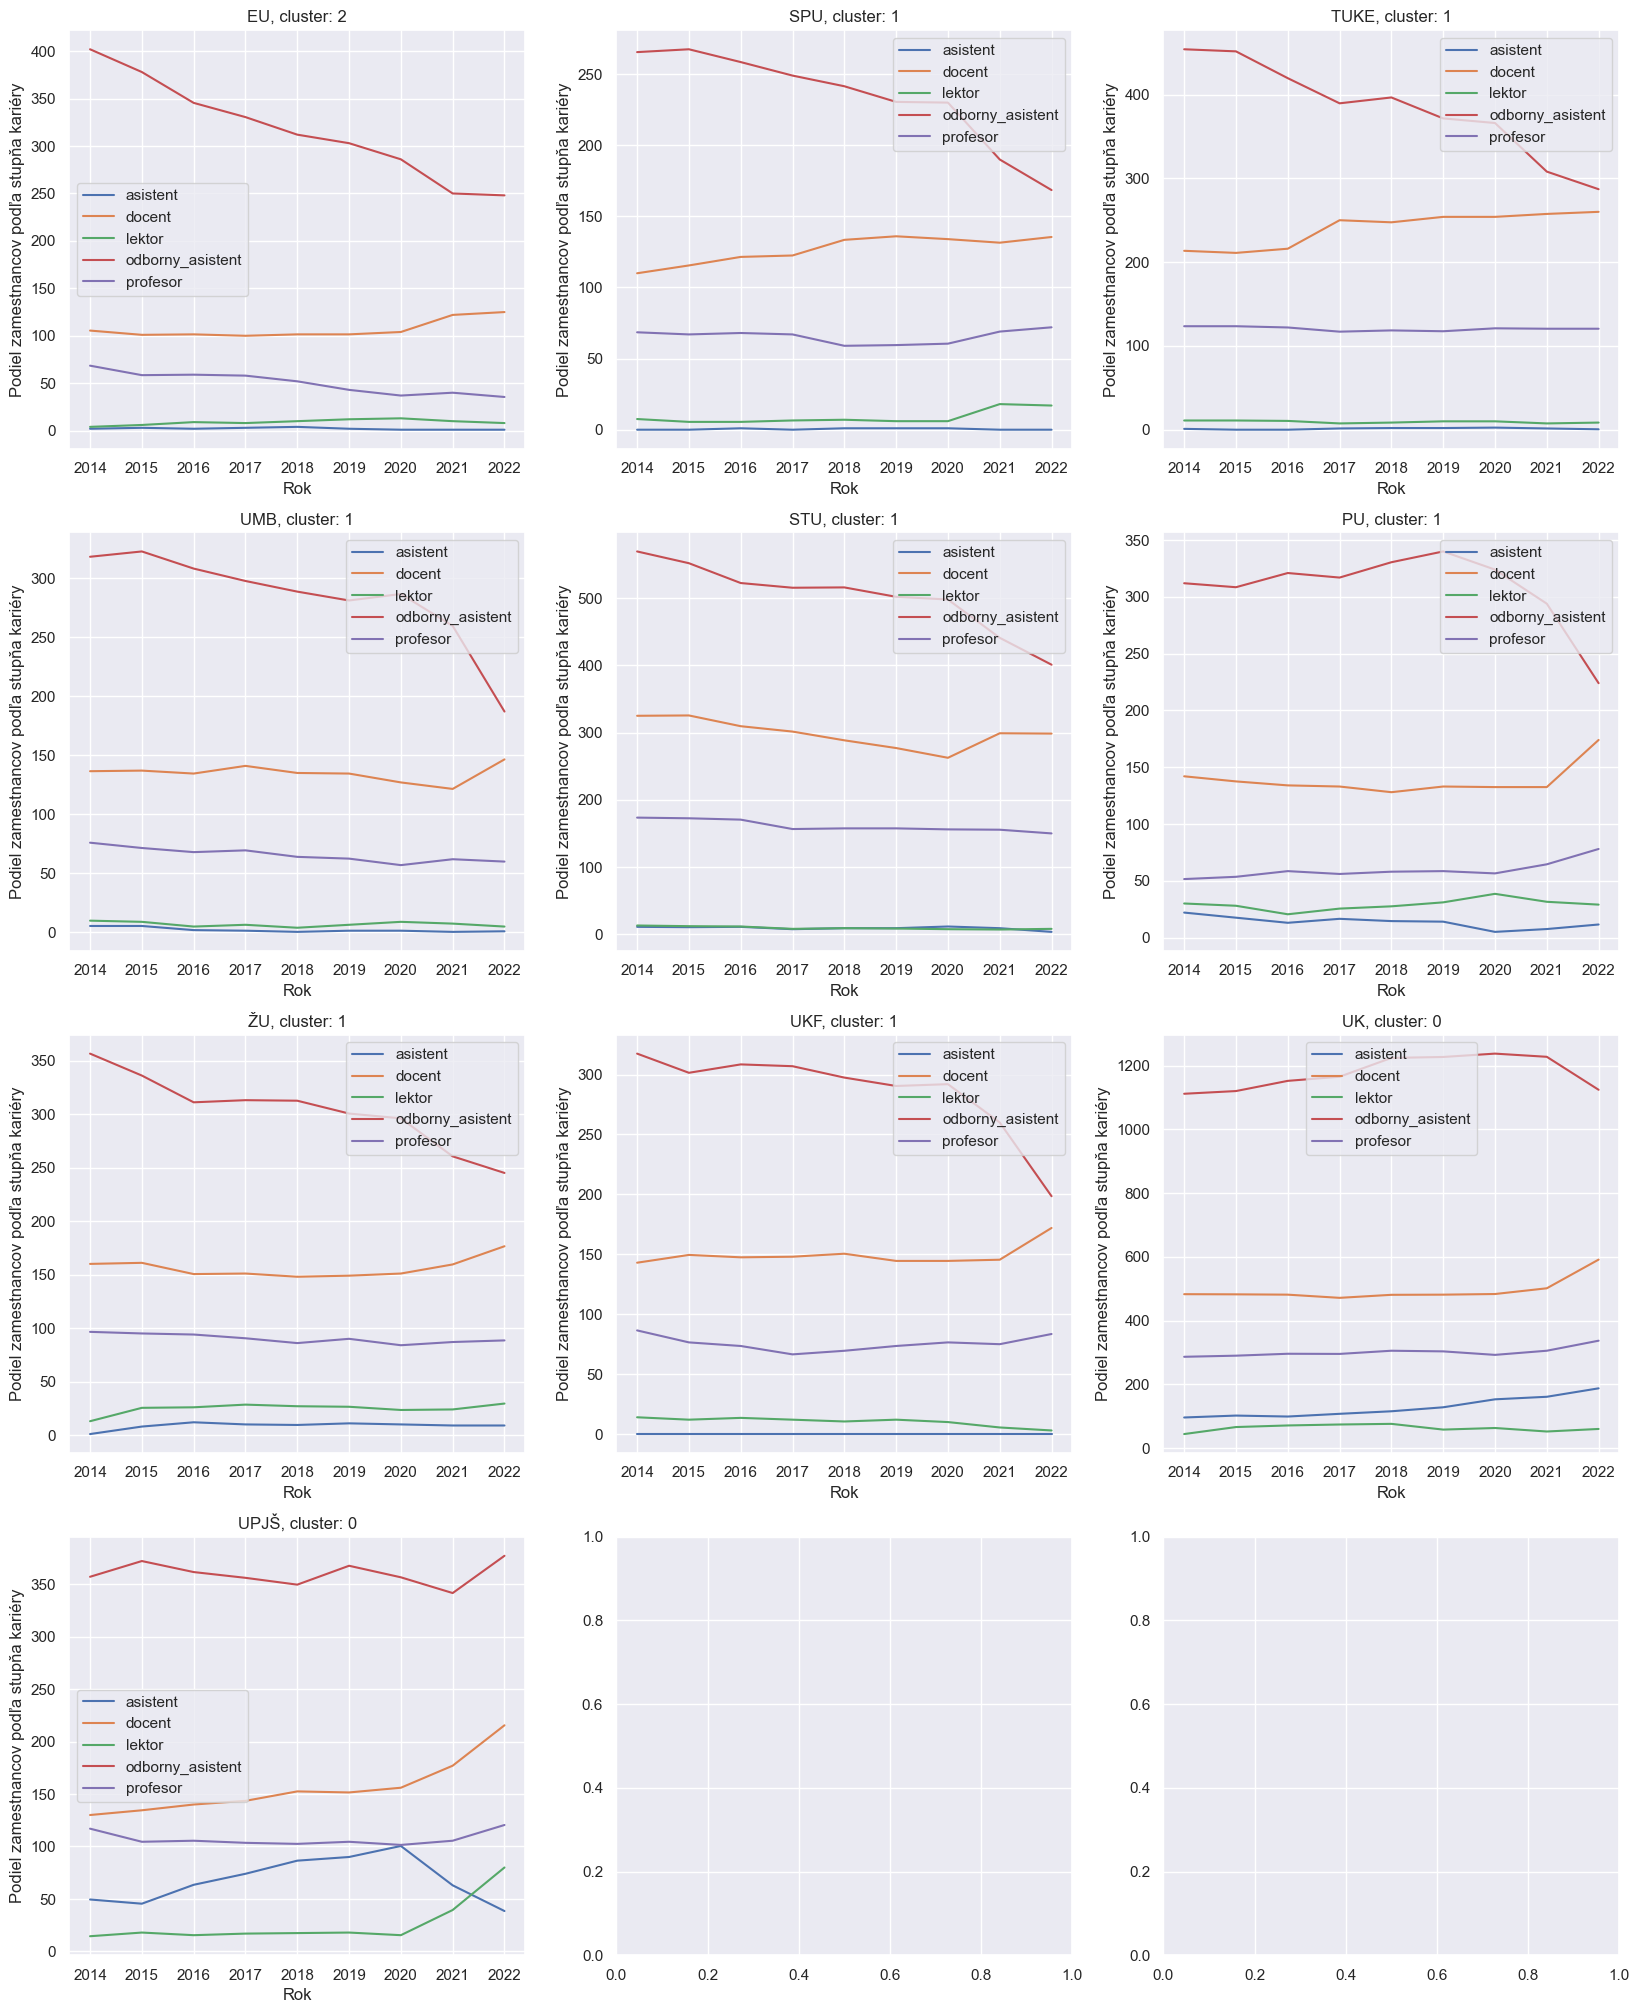

In [101]:
features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'budget_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])
features
records = []

cols = 3
rows = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (20, 25))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    
    labels = ['asistent', 'docent', 'lektor', 'odborny_asistent', 'profesor']

    X = features.query('uni == @uni and year > 2013')[['year']].values
    Y = features.query('uni == @uni and year > 2013')[labels].values
    
    cluster = features.query('uni == @uni and year > 2013')['cluster_id'].values[0]
    
    for k, label in enumerate(labels):
        y = Y[:, k]
        ax[r][c].plot(X, y, '-')
    
    
    ax[r][c].set_title(f'{uni}, cluster: {cluster}')
    ax[r][c].set_ylabel('Podiel zamestnancov podľa stupňa kariéry')
    ax[r][c].set_xlabel('Rok')
    ax[r][c].legend(labels)

fig.savefig('../report/assets/typy_zamestnancov_absolutne_podla_skol', bbox_inches='tight')
